### Variance Inflation Factor (VIF): Addressing Multicollinearity in Regression Analysis

Learn how to detect multicollinearity in regression models using the variance inflation factor (VIF), a key diagnostic tool. This tutorial explains how VIF is calculated, how to interpret its values, and techniques for addressing high VIF to improve the reliability of your regression modeling.

In regression analysis, multicollinearity occurs when independent variables are correlated with each other. This makes it difficult to determine the unique influence of each predictor on the dependent variable. As a result, you have inflated standard errors, which in turn affects the significance of coefficients.

The variance inflation factor (VIF) is a great tool for detecting multicollinearity, offering insights beyond simple pairwise correlations. This tutorial explains how VIF works, how to calculate and interpret it, and what to do if you find high VIF values. These steps will help you as data professionals and data scientists to improve your model’s stability.

Now, while VIF is an important diagnostic tool and it’s well worth learning, it represents just a small part of the broader skill set you'll develop in our Machine Learning Scientist in Python career track, so enroll today.

### What is Variance Inflation Factor (VIF)?

Developed by statistician Cuthbert Daniel, VIF is a widely used diagnostic tool in regression analysis to detect multicollinearity, which is known to affect the stability and interpretability of regression coefficients. More technically, VIF works by quantifying how much the variance of a regression coefficient is inflated due to correlations among predictors. 

All of this is important because these correlations make it difficult to isolate the unique effect of each predictor on the target variable, leading to less reliable model estimates. I should also say that, in order to really tell the right story, VIF is always calculated for each predictor in a model. 

The variance inflation factor formula

The VIF for a predictor X is calculated as: 

Variance inflation factor (VIF) formula  1 - R2

Where: 
    R2 is the coefficient of determination obtained when X​ is regressed on all other predictors.


### Step-by-step calculation

Finding VIF is a three-step process. The first step is to fit a separate linear regression model for each predictor against all other predictors. The second step is to obtain the R2 value for each model. The final step is to calculate VIF using the formula above.

### Interpretation of VIF Values

Here’s how to interpret VIF values to understand the level of multicollinearity:

    VIF = 1: This indicates no multicollinearity. The predictor is not correlated with other predictors, so it doesn’t inflate the standard error or affect the model’s stability.
    VIF between 1 and 5: This suggests moderate multicollinearity. There’s some correlation with other predictors, but it’s usually not severe. However, it’s worth keeping an eye on these predictors to see if multicollinearity becomes a problem, especially if other VIF values are high.
    VIF > 5: High multicollinearity is present. The predictor’s standard error may be noticeably inflated, which can make its coefficient less reliable. Consider taking steps to reduce multicollinearity, like removing or combining correlated predictors.
    VIF > 10: This signals serious multicollinearity. The predictor’s standard error is highly inflated, and its coefficient estimate is likely unstable. Corrective actions, such as removing the predictor or using regularization techniques, are usually needed.

For instance, if a predictor’s VIF is 10, it indicates that the variance of that predictor’s coefficient is 10 times what it would be if there were no multicollinearity. 

### How the VIF Explains Multicollinearity in Regression

Multicollinearity causes standard errors to increase, which makes it harder to assess the significance of individual predictors. This happens because collinear variables carry similar information, making it difficult to separate their specific individual effects on the outcome variable. 

Although multicollinearity doesn’t necessarily harm the model’s ability to predict, it does reduce the reliability and clarity of the coefficients. This is especially problematic when we want to understand the individual impact of each predictor.

The variance inflation factor (VIF) serves as a precise diagnostic metric to identify multicollinearity. Unlike general observations about correlation, VIF isolates the combined effect of all predictors on each variable, highlighting interactions that might not be evident from pairwise correlations. 

### Dataset Overview:

This fictitious dataset represents survey results from a study conducted across 1,000 stores of a retail giant. Customers at each store were asked to rate various aspects of their shopping experience on a scale from -5 to +5, where -5 indicates a very negative experience, and +5 indicates a very positive experience. The average of the customer ratings at each store was taken across four key parameters:

    Ambience: Customer perception of the store's environment, such as cleanliness, layout, lighting, and overall atmosphere. 

    Customer_service: Rating of the service provided by store staff, including helpfulness, friendliness, and responsiveness to customer needs.

    Offers: Rating of the store's promotional offers, discounts, and deals available to customers.

    Product_range: Evaluation of the variety and quality of products available in the store.
    
The target variable, Performance, measures the overall performance of each store. 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [15]:
datacamp_retail_data = pd.read_csv('vif_data.csv')

In [17]:
datacamp_retail_data.head()

,Ambience,Customer_service,Offers,Product_range,Performance
0,0.50,1.40,-0.68,0.48,2
1,-0.14,0.92,-0.14,0.11,7
2,0.65,0.06,-0.79,0.51,5
3,1.52,-0.65,-0.31,1.12,9
4,-0.23,0.70,-1.89,1.10,8


As a next step, we can run a correlation matrix to check for pairwise correlation. 

The code below selects four columns and stores them in a new DataFrame called correl_data. It then computes the pairwise correlation matrix using the .corr() function. The result is stored in the object, corr_matrix, which is a table showing the correlation coefficients between each pair of the selected columns. 

The matrix is then visualized using Seaborn's heatmap() function, displaying each correlation coefficient as a color-coded cell, where blue represents negative correlations and red represents positive correlations, based on the coolwarm color map. 

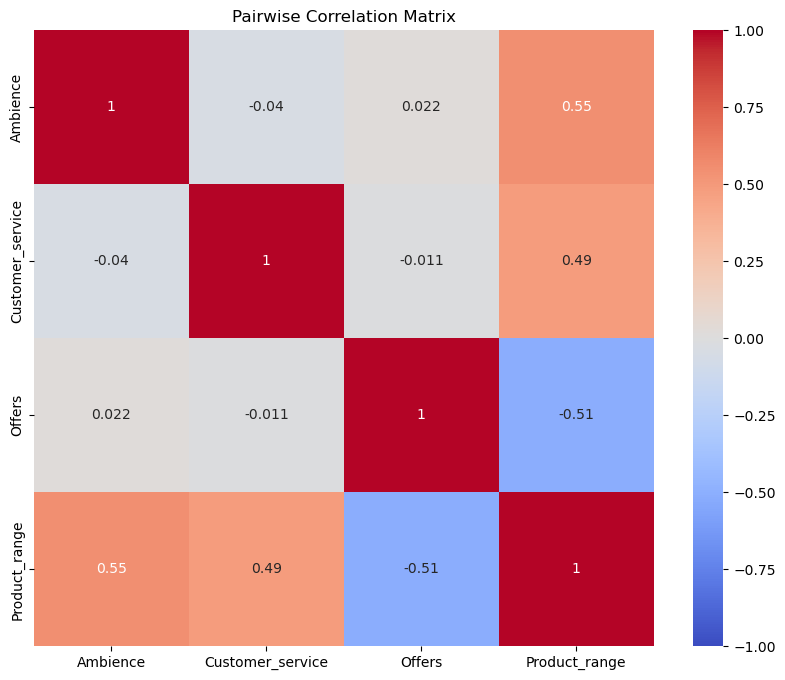

In [20]:
correl_data = datacamp_retail_data[['Ambience', 'Customer_service', 'Offers', 'Product_range']]

# Compute the pairwise correlation matrix
corr_matrix = correl_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pairwise Correlation Matrix')
plt.show()

The plot provides a visual summary of relationships between variables in correl_data. The correlation values range from -1 to 1, where values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values around 0 suggest no correlation. It is evident that there is no strong pairwise correlation amongst the variables, with none of the correlation values being greater than even 0.6. 

The next step is to calculate the VIF values for the predictor variables. The code below calculates the values for each predictor variable in the dataset to check for multicollinearity. 

First, it defines X by removing the target column Performance and adding an intercept. Then, it creates a DataFrame, datacamp_vif_data,  to store the predictor names and their VIF values. Using a loop, it then calculates the VIF for each predictor with the variance_inflation_factor() function, where higher VIFs indicate presence of multicollinearity. 

In [24]:
# Define the predictor variables
X = datacamp_retail_data.drop(columns=['Performance'])

# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
datacamp_vif_data = pd.DataFrame()
datacamp_vif_data['Feature'] = X.columns
datacamp_vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(datacamp_vif_data)

            Feature       VIF
0             const  1.005825
1          Ambience  3.007933
2  Customer_service  2.543664
3            Offers  2.582033
4     Product_range  5.942743


This output shows the VIF value for each predictor variable, indicating multicollinearity levels in the dataset. The const row represents the intercept term, with a VIF close to 1, meaning it has no multicollinearity. Among the predictor variables, Product_range has the highest VIF (5.94), which suggests that it needs corrective measures. All the other predictors have VIF values below 3, indicating low multicollinearity. 